# Problem Statement

Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.

# Abstract

Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
df.head().T

,0,1,2,3,4
unique_id,0,1,2,3,4
h1n1_worry,1.0,3.0,1.0,1.0,2.0
h1n1_awareness,0.0,2.0,1.0,1.0,1.0
antiviral_medication,0.0,0.0,0.0,0.0,0.0
contact_avoidance,0.0,1.0,1.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,0.0,1.0,0.0,1.0,1.0
avoid_large_gatherings,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,1.0,1.0,0.0,0.0,0.0
avoid_touch_face,1.0,1.0,0.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,26707.0,NaN,NaN,NaN,13353.0,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,NaN,NaN,NaN,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,NaN,NaN,NaN,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,NaN,NaN,NaN,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,NaN,NaN,NaN,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,NaN,NaN,NaN,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,NaN,NaN,NaN,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,NaN,NaN,NaN,0.35864,0.47961,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,NaN,NaN,NaN,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,NaN,NaN,NaN,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [6]:
df[df.duplicated()]

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine


In [7]:
df.shape

(26707, 34)

In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [9]:
df1=df.dropna()

<Axes: >

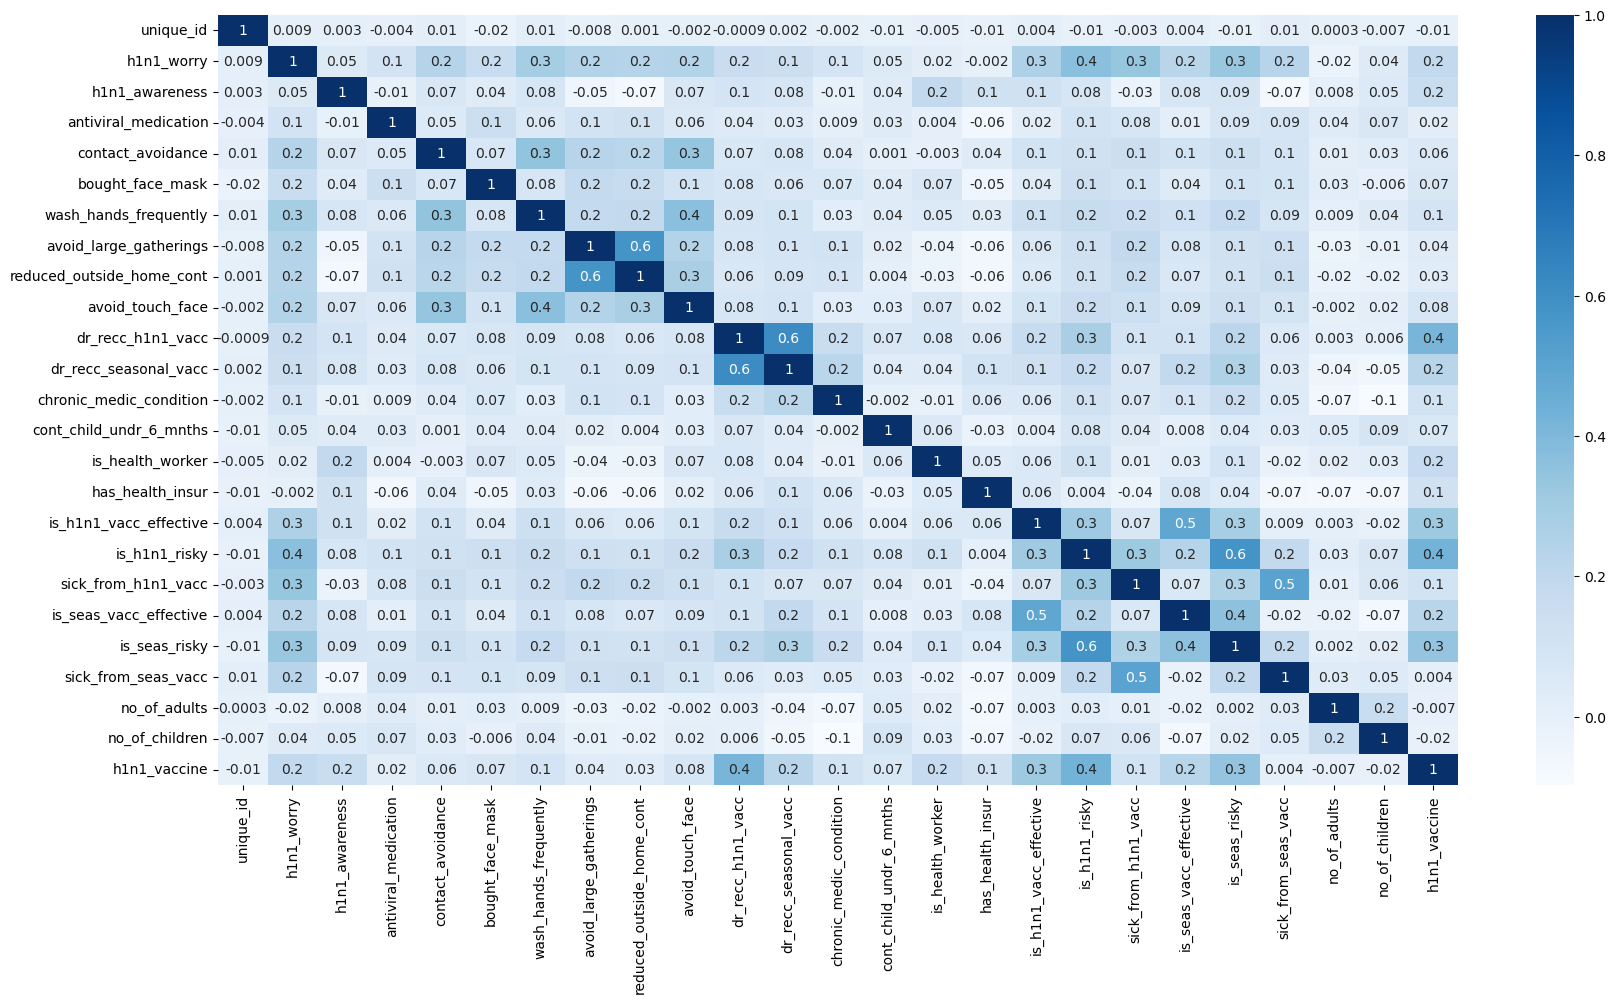

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1g',cmap='Blues')

In [11]:
# Here the heatmap says that the correlation between avoid_large_gathering and reduced_outside_home_cont is 0.6
# And also the correlation between the dr_recc_h1ni_vacc and dr_recc_seasonal_vacc is 0.6

In [12]:
df1.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [13]:
df['avoid_large_gatherings'].fillna(df['reduced_outside_home_cont'],inplace=True)

In [14]:
df['reduced_outside_home_cont'].fillna(df['avoid_large_gatherings'],inplace=True)

In [15]:
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_seasonal_vacc'],inplace=True)

In [16]:
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_h1n1_vacc'],inplace=True)

In [17]:
df[df['dr_recc_seasonal_vacc'].isnull()].T

,2,76,90,94,97,102,149,153,169,180,...,26658,26661,26662,26664,26671,26675,26679,26682,26692,26695
unique_id,2,76,90,94,97,102,149,153,169,180,...,26658,26661,26662,26664,26671,26675,26679,26682,26692,26695
h1n1_worry,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,...,1.0,3.0,2.0,3.0,1.0,2.0,3.0,2.0,1.0,0.0
h1n1_awareness,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,...,2.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0
antiviral_medication,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contact_avoidance,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
avoid_large_gatherings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
reduced_outside_home_cont,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
avoid_touch_face,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [18]:
df.loc[df['is_h1n1_risky']==1,'is_seas_risky']=df.loc[df['is_h1n1_risky']==1,'is_seas_risky'].fillna(df[df['is_h1n1_risky']==1]['is_seas_risky'].mode()[0])

In [19]:
df.loc[df['is_h1n1_risky']==2,'is_seas_risky']=df.loc[df['is_h1n1_risky']==2,'is_seas_risky'].fillna(df[df['is_h1n1_risky']==2]['is_seas_risky'].mode()[0])

In [20]:
df.loc[df['is_h1n1_risky']==3,'is_seas_risky']=df.loc[df['is_h1n1_risky']==3,'is_seas_risky'].fillna(df[df['is_h1n1_risky']==3]['is_seas_risky'].mode()[0])

In [21]:
df.loc[df['is_h1n1_risky']==4,'is_seas_risky']=df.loc[df['is_h1n1_risky']==4,'is_seas_risky'].fillna(df[df['is_h1n1_risky']==4]['is_seas_risky'].mode()[0])

In [22]:
df.loc[df['is_h1n1_risky']==5,'is_seas_risky']=df.loc[df['is_h1n1_risky']==5,'is_seas_risky'].fillna(df[df['is_h1n1_risky']==5]['is_seas_risky'].mode()[0])

In [23]:
for i in range(1,6):
    df.loc[df['is_seas_risky']==i,'is_h1n1_risky']=df.loc[df['is_seas_risky']==i,'is_h1n1_risky'].fillna(df[df['is_seas_risky']==i]['is_h1n1_risky'].mode()[0])

In [24]:
df.drop('unique_id',axis=1,inplace=True)

In [25]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [26]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
df['age_bracket']=pd.Categorical(df['age_bracket']).codes

In [30]:
df['qualification']=pd.Categorical(df['qualification']).codes

In [31]:
df['race']=pd.Categorical(df['race']).codes

In [32]:
df['income_level']=pd.Categorical(df['income_level']).codes

In [33]:
df['census_msa']=pd.Categorical(df['census_msa']).codes

In [34]:
df['age_bracket']=df['age_bracket'].astype("int")
df['qualification']=df['qualification'].astype("int")
df['race']=df['race'].astype("int")
df['income_level']=df['income_level'].astype("int")
df['census_msa']=df['census_msa'].astype("int")

In [35]:
df=pd.get_dummies(df,drop_first=True)

In [36]:
df.head().T

,0,1,2,3,4
h1n1_worry,1.0,3.0,1.0,1.0,2.0
h1n1_awareness,0.0,2.0,1.0,1.0,1.0
antiviral_medication,0.0,0.0,0.0,0.0,0.0
contact_avoidance,0.0,1.0,1.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,0.0,1.0,0.0,1.0,1.0
avoid_large_gatherings,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,1.0,1.0,0.0,0.0,0.0
avoid_touch_face,1.0,1.0,0.0,0.0,1.0
dr_recc_h1n1_vacc,0.0,0.0,0.0,0.0,0.0


## Here the target variable is h1n1_vaccine

In [ ]:
x=df.drop("h1n1_vaccine",axis=1)
y=df[["h1n1_vaccine"]]

In [ ]:
y.value_counts()

### Here we split the train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model=LogisticRegression(verbose=True,penalty='none')

In [ ]:
logit_model.fit(x_train,y_train)

In [ ]:
## Accuracy on Train
logit_model.score(x_train,y_train)

In [ ]:
## Accuracy on Test
logit_model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [ ]:
ytrain_predict=logit_model.predict(x_train)

In [ ]:
ytest_predict=logit_model.predict(x_test)

In [ ]:
ytrain_predict

In [ ]:
train_predict_prob=logit_model.predict_proba(x_train)
train_predict_prob

In [ ]:
pd.DataFrame(train_predict_prob)

In [ ]:
# Confusion Matrix on Train data
confusion_matrix(y_train,ytrain_predict)

In [ ]:
## Confusion Matrix on the test data
confusion_matrix(y_test,ytest_predict)

In [ ]:
predict_train=logit_model.predict(x_train)
predict_test=logit_model.predict(x_test)

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

# Checking Multicollinearity(Variance Inflation Factor) 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF to check my multi-colinearity 
# features having vif > 10 are causing Multicolinerity
# Drop Features one by one and the check the corresponding vif scores
VIF=[variance_inflation_factor(x.values,j) for j in range(x.shape[1])]
i=0
for column in x.columns:
    if i<10:
        print(column,VIF[i])
        i=i+1

# Checking Endogenicity(Hausman Test)

In [ ]:
result=logit_model.fit(x_train,y_train)


In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data or replace this with your data loading code
# For example, assuming you have a DataFrame df:
# X = df[['independent_var1', 'independent_var2', ...]]
# y = df['dependent_variable']

# Fit logistic regression model
x=sm.add_constant(x)
model = sm.Logit(y, x)
result = model.fit()



In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'x' is your independent variable matrix and 'y' is your dependent variable
x = sm.add_constant(x)
model = sm.Logit(y, x)
result = model.fit()

# Get predicted probabilities
predicted_probs = result.predict(x)

# Plot partial residuals against predicted probabilities
sns.residplot(x=predicted_probs, y=result.resid_dev, lowess=True, line_kws={'color': 'red'})
plt.title('Partial Residual Plot for Linearity Check')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Partial Residuals')
plt.show()


In [ ]:
from statsmodels.stats.contingency_tables import hosmerlemeshow

# Assuming 'result' is your logistic regression model result and 'y' is your dependent variable
hl_statistic, hl_p_value = hosmerlemeshow(result.resid_dev, y)
print(f'Hosmer-Lemeshow Statistic: {hl_statistic}')
print(f'P-value: {hl_p_value}')



# Checking Autocorrelation(Dubin Watson Test)

In [ ]:
dw_statistic = sms.durbin_watson(result.resid_dev)
print(f'Durbin-Watson Statistic: {dw_statistic}')


# Manipulating the data

In [37]:
df["h1n1_worry"]=np.where(df["h1n1_worry"]==1,0,df["h1n1_worry"])
df["h1n1_worry"]=np.where(df["h1n1_worry"]==2,1,df["h1n1_worry"])
df["h1n1_worry"]=np.where(df["h1n1_worry"]==3,1,df["h1n1_worry"])
df["h1n1_awareness"]=np.where(df["h1n1_awareness"]==2,1,df["h1n1_awareness"])

In [38]:
df.head(1).T

,0
h1n1_worry,0.0
h1n1_awareness,0.0
antiviral_medication,0.0
contact_avoidance,0.0
bought_face_mask,0.0
wash_hands_frequently,0.0
avoid_large_gatherings,0.0
reduced_outside_home_cont,1.0
avoid_touch_face,1.0
dr_recc_h1n1_vacc,0.0


In [39]:
for i in ["is_h1n1_vacc_effective","is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc"]:
    df[i]=np.where((df[i] == 1) | (df[i] == 2),0,df[i])
    df[i]=np.where(df[i]==3,1,df[i])
    df[i]=np.where((df[i] == 4) | (df[i] == 5),2,df[i])

In [40]:
for i in ["is_h1n1_vacc_effective","is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc"]:
    df[i]=df[i].astype("object")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   h1n1_worry                     26697 non-null  float64
 1   h1n1_awareness                 26697 non-null  float64
 2   antiviral_medication           26697 non-null  float64
 3   contact_avoidance              26697 non-null  float64
 4   bought_face_mask               26697 non-null  float64
 5   wash_hands_frequently          26697 non-null  float64
 6   avoid_large_gatherings         26697 non-null  float64
 7   reduced_outside_home_cont      26697 non-null  float64
 8   avoid_touch_face               26697 non-null  float64
 9   dr_recc_h1n1_vacc              26697 non-null  float64
 10  dr_recc_seasonal_vacc          26697 non-null  float64
 11  chronic_medic_condition        26697 non-null  float64
 12  cont_child_undr_6_mnths        26697 non-null 

In [42]:
df=pd.get_dummies(df,drop_first=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 26706
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   h1n1_worry                     26697 non-null  float64
 1   h1n1_awareness                 26697 non-null  float64
 2   antiviral_medication           26697 non-null  float64
 3   contact_avoidance              26697 non-null  float64
 4   bought_face_mask               26697 non-null  float64
 5   wash_hands_frequently          26697 non-null  float64
 6   avoid_large_gatherings         26697 non-null  float64
 7   reduced_outside_home_cont      26697 non-null  float64
 8   avoid_touch_face               26697 non-null  float64
 9   dr_recc_h1n1_vacc              26697 non-null  float64
 10  dr_recc_seasonal_vacc          26697 non-null  float64
 11  chronic_medic_condition        26697 non-null  float64
 12  cont_child_undr_6_mnths        26697 non-null 

In [44]:
df['age_bracket']=df['age_bracket'].astype("object")
df['qualification']=df['qualification'].astype("object")
df['race']=df['race'].astype("object")
df['income_level']=df['income_level'].astype("object")
df['census_msa']=df['census_msa'].astype("object")

In [45]:
df=pd.get_dummies(df,drop_first=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 26706
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   h1n1_worry                     26697 non-null  float64
 1   h1n1_awareness                 26697 non-null  float64
 2   antiviral_medication           26697 non-null  float64
 3   contact_avoidance              26697 non-null  float64
 4   bought_face_mask               26697 non-null  float64
 5   wash_hands_frequently          26697 non-null  float64
 6   avoid_large_gatherings         26697 non-null  float64
 7   reduced_outside_home_cont      26697 non-null  float64
 8   avoid_touch_face               26697 non-null  float64
 9   dr_recc_h1n1_vacc              26697 non-null  float64
 10  dr_recc_seasonal_vacc          26697 non-null  float64
 11  chronic_medic_condition        26697 non-null  float64
 12  cont_child_undr_6_mnths        26697 non-null 

In [47]:
x=df.drop("h1n1_vaccine",axis=1)
y=df[["h1n1_vaccine"]]

In [48]:
y.shape

(26697, 1)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [ ]:
# logistic regression has penalty as hyper parameter compared to linear regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(verbose=True)
logit_model.fit(x_train,y_train)

In [ ]:
predict_train=logit_model.predict(x_train)
predict_test=logit_model.predict(x_test)

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# Create a logistic regression model
logreg_model = LogisticRegression()

# Create RFE model and select the number of features to keep (here, 5)
rfe = RFE(estimator=logreg_model, n_features_to_select=5)

# Fit the RFE model on the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = np.array(range(len(x_train.columns)))[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)





In [ ]:
# Transform the training and testing datasets
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Train a logistic regression model on the selected features
logreg_model.fit(x_train_rfe,y_train)
predict_train=logreg_model.predict(x_train_rfe)
predict_test=logreg_model.predict(x_test_rfe)

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



# Create SelectKBest model with chi-squared scoring function and specify k (number of features to keep)
k_best = SelectKBest(chi2, k=5)

# Fit and transform the training data
x_train_kbest = k_best.fit_transform(x_train, y_train)

# Get the selected features
selected_features = np.where(k_best.get_support())[0]

# Print the selected features
print("Selected Features:", selected_features)

# Transform the testing data
x_test_kbest = k_best.transform(x_test)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train a logistic regression model on the selected features
logreg_model.fit(x_train_kbest, y_train)


predict_train=logreg_model.predict(x_train_kbest)
predict_test=logreg_model.predict(x_test_kbest)

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
Sm=SMOTE()

In [ ]:
x_Train_res,y_Train_res=Sm.fit_resample(x_train,y_train)

In [ ]:
x_train.shape

In [ ]:
x_Train_res.shape

In [ ]:
y_Train_res.value_counts()

In [ ]:
sm_model=LogisticRegression()

In [ ]:
sm_model.fit(x_Train_res,y_Train_res)

In [ ]:
ytrain_pred=sm_model.predict(x_Train_res)
ytest_pred=sm_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_Train_res,ytrain_pred),annot=True,fmt='g',cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,ytest_pred),annot=True,fmt='g',cmap='Blues')
print(classification_report(y_Train_res,ytrain_pred))
print(classification_report(y_test,ytest_pred))

# ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
ad=ADASYN()

In [ ]:
x_train_ad,y_train_ad=ad.fit_resample(x_train,y_train)

In [ ]:
bal_model=LogisticRegression( )

In [ ]:
bal_model.fit(x_train_ad,y_train_ad)

In [ ]:
ytrain_pred=bal_model.predict(x_train_ad)
ytest_pred=bal_model.predict(x_test)
print(classification_report(y_train_ad,ytrain_pred))
print(classification_report(y_test,ytest_pred))

In [ ]:
LogisticRegression(class_weight='balanced').fit(x_train,y_train)

In [ ]:
ytrain_pred=bal_model.predict(x_train)
ytest_pred=bal_model.predict(x_test)
print(classification_report(y_train,ytrain_pred))
print(classification_report(y_test,ytest_pred))

# Feature Selection Data

In [ ]:
names=[]
for i in [8,12,21,22,24]:
    names.append(df.columns[i])

In [ ]:
names.append("h1n1_vaccine")

In [ ]:
names

In [ ]:
df1=pd.DataFrame()
for i in names:
    df1[i]=df[i]

In [ ]:
df1

In [ ]:
x=df1.drop("h1n1_vaccine",axis=1)
y=df1[["h1n1_vaccine"]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)
from imblearn.over_sampling import SMOTE

Sm=SMOTE()

x_Train_res,y_Train_res=Sm.fit_resample(x_train,y_train)


sm_model=LogisticRegression()

sm_model.fit(x_Train_res,y_Train_res)

ytrain_pred=sm_model.predict(x_Train_res)
ytest_pred=sm_model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_Train_res,ytrain_pred),annot=True,fmt='g',cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,ytest_pred),annot=True,fmt='g',cmap='Blues')
print(classification_report(y_Train_res,ytrain_pred))
print(classification_report(y_test,ytest_pred))


In [ ]:
from imblearn.over_sampling import ADASYN

ad=ADASYN()

x_train_ad,y_train_ad=ad.fit_resample(x_train,y_train)

bal_model=LogisticRegression( )

bal_model.fit(x_train_ad,y_train_ad)

ytrain_pred=bal_model.predict(x_train_ad)
ytest_pred=bal_model.predict(x_test)
print(classification_report(y_train_ad,ytrain_pred))
print(classification_report(y_test,ytest_pred))



# GRIDSEARCH(CV)

In [67]:
## GridSearch CV (Cross Validation)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
grid={'penalty':['l1', 'l2', 'elasticnet', None],
     'tol':[0.95,0.1,0.15,0.2],
      'C':[0.1,1.0],
     'solver':['lbfgs','sag','saga']}

In [104]:
model=LogisticRegression(class_weight='balanced')
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=10,scoring='recall')

In [86]:
grid_search.fit(x_train,y_train)


KeyboardInterrupt



In [71]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}

In [72]:
best_model=grid_search.best_estimator_

In [73]:
## Accuracy on the best model
best_model.score(x_train,y_train)

0.8317011826403382

In [74]:
best_model.score(x_test,y_test)

0.8320848938826467

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     14715
           1       0.68      0.40      0.50      3972

    accuracy                           0.83     18687
   macro avg       0.77      0.67      0.70     18687
weighted avg       0.82      0.83      0.81     18687

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6308
           1       0.67      0.41      0.51      1702

    accuracy                           0.83      8010
   macro avg       0.76      0.68      0.70      8010
weighted avg       0.82      0.83      0.82      8010



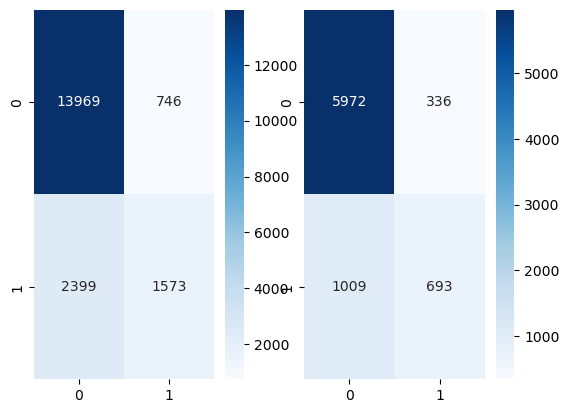

In [75]:
predict_train=best_model.predict(x_train)
predict_test=best_model.predict(x_test)
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

# GRIDSEARCH USING SMOTE

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)
from imblearn.over_sampling import SMOTE

Sm=SMOTE()

x_train_res,y_train_res=Sm.fit_resample(x_train,y_train)

In [106]:
grid_search.fit(x_train_res,y_train_res)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.1, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.95, 0.1, 0.15, 0.2]},
             scoring='recall')

In [107]:
best_model

LogisticRegression(penalty=None, solver='saga', tol=0.1)

In [108]:
best_model=grid_search.best_estimator_

In [109]:
best_model.score(x_train_res,y_train_res)

0.7616038056405029

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     14715
           1       0.77      0.75      0.76     14715

    accuracy                           0.76     29430
   macro avg       0.76      0.76      0.76     29430
weighted avg       0.76      0.76      0.76     29430

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      6308
           1       0.44      0.67      0.53      1702

    accuracy                           0.75      8010
   macro avg       0.67      0.72      0.68      8010
weighted avg       0.80      0.75      0.77      8010



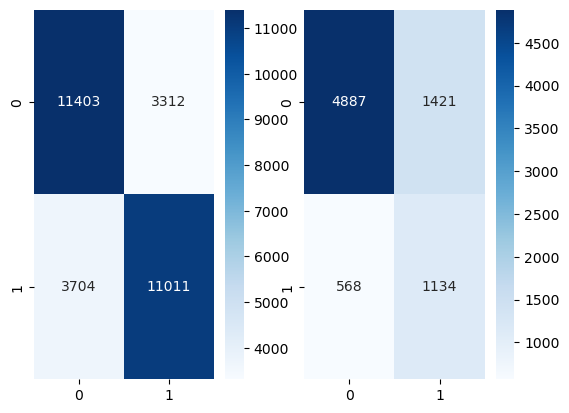

In [110]:
predict_train=best_model.predict(x_train_res)
predict_test=best_model.predict(x_test)
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train_res,predict_train),annot=True,fmt="g",cmap='Blues')
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,predict_test),annot=True,fmt="g",cmap='Blues')
print(classification_report(y_train_res,predict_train))
print(classification_report(y_test,predict_test))